# Importing libraries

In [14]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt

# Loading and analyzing data

In [ ]:
books = pd.read_csv('data/books.csv')
ratings = pd.read_csv('data/ratings.csv')
users = pd.read_csv('data/users.csv')

In [7]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [8]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [9]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [3]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [5]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [6]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


#### Cleaning data

Let's remove unneccesary columns: publisher and images of books.

In [10]:
books = books.drop(columns=["Publisher", "Image-URL-S", "Image-URL-M", "Image-URL-L"])
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication
0,0195153448,Classical Mythology,Mark P. O. Morford,2002
1,0002005018,Clara Callan,Richard Bruce Wright,2001
2,0060973129,Decision in Normandy,Carlo D'Este,1991
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999


#### Analyzing the distribution of ratings per user

In [26]:
# Count the number of ratings each user has given
user_ratings = ratings.groupby('User-ID')['Book-Rating'].count()
user_ratings

User-ID
2          1
7          1
8         18
9          3
10         2
          ..
278846     2
278849     4
278851    23
278852     1
278854     8
Name: Book-Rating, Length: 105283, dtype: int64

In [27]:
# Count the number of users that have given a cetrain number of ratings
ratings_counts = user_ratings.value_counts()
ratings_counts

Book-Rating
1       59166
2       12502
3        6534
4        4265
5        3099
        ...  
1163        1
941         1
1332        1
387         1
4533        1
Name: count, Length: 682, dtype: int64

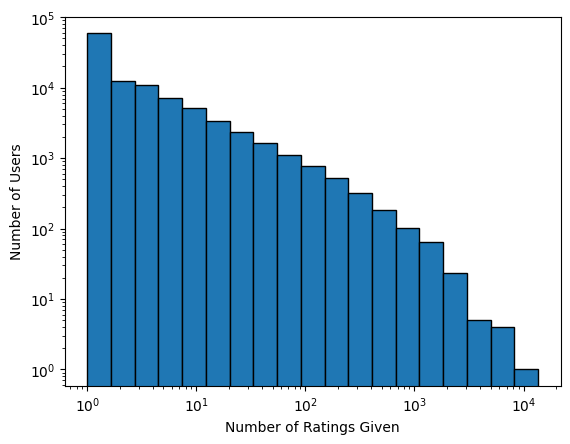

In [24]:
# Create logarithmic bins from 1 to max number of ratings by a user
bins = np.logspace(0, np.log10(user_ratings.max()+1), num=20)

# Plot the histogram with logarithmic bins
plt.hist(user_ratings, bins=bins, edgecolor='black')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of Ratings Given')
plt.ylabel('Number of Users')
plt.show()


# Transforming data

We need to transform data into a more usable format for collaborative filtering algorithm. Let's create a Y matrix containing users' ratings as columns and book titles as rows, and an R matrix of the same size with a value of 1 if the book is rated by a user and 0 otherwise. After analyzing the distribution of ratings per user I decided to take into account only users who gave 10 or more ratings.

In [32]:
# Filter the ratings to exclude users with less than 10 ratings
filtered_users = user_ratings[user_ratings >= 10].index
filtered_ratings = ratings[ratings['User-ID'].isin(filtered_users)]

Y = filtered_ratings.pivot_table(index='ISBN', columns='User-ID', values='Book-Rating')
Y

c:\Users\blaze\OneDrive\Pulpit\spotify-recommendation directories\book-recommendation\.venv\Lib\site-packages\pandas\core\reshape\reshape.py:143: RuntimeWarning: overflow encountered in scalar multiply
  num_cells = num_rows * num_columns


ValueError: negative dimensions are not allowed